# EDA

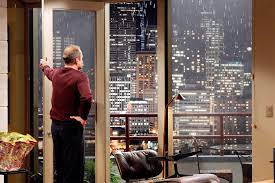

In [40]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [41]:
import pandas as pd
df_house = pd.read_csv('data/Joinedtable.csv') 
df_house


id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520     3.000      1.000     1180.000  5650.000   1.000   
1      6414100192     3.000      2.250     2570.000  7242.000   2.000   
2      5631500400     2.000      1.000      770.000 10000.000   1.000   
3      2487200875     4.000      3.000     1960.000  5000.000   1.000   
4      1954400510     3.000      2.000     1680.000  8080.000   1.000   
...           ...       ...        ...          ...       ...     ...   
21592   263000018     3.000      2.500     1530.000  1131.000   3.000   
21593  6600060120     4.000      2.500     2310.000  5813.000   2.000   
21594  1523300141     2.000      0.750     1020.000  1350.000   2.000   
21595   291310100     3.000      2.500     1600.000  2388.000   2.000   
21596  1523300157     2.000      0.750     1020.000  1076.000   2.000   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
0             NaN 0.000          3      7  ...          0.000      1955   
1           0.000 0.000          3      7  ...        400.000      1951   
2           0.000 0.000          3      6  ...          0.000      1933   
3           0.000 0.000          5      7  ...        910.000      1965   
4           0.000 0.000          3      8  ...          0.000      1987   
...           ...   ...        ...    ...  ...            ...       ...   
21592       0.000 0.000          3      8  ...          0.000      2009   
21593       0.000 0.000          3      8  ...          0.000      2014   
21594       0.000 0.000          3      7  ...          0.000      2009   
21595         NaN 0.000          3      8  ...          0.000      2004   
21596       0.000 0.000          3      7  ...          0.000      2008   

       yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  \
0             0.000    98178 47.511 -122.257       1340.000    5650.000   
1         19910.000    98125 47.721 -122.319       1690.000    7639.000   
2               NaN    98028 47.738 -122.233       2720.000    8062.000   
3             0.000    98136 47.521 -122.393       1360.000    5000.000   
4             0.000    98074 47.617 -122.045       1800.000    7503.000   
...             ...      ...    ...      ...            ...         ...   
21592         0.000    98103 47.699 -122.346       1530.000    1509.000   
21593         0.000    98146 47.511 -122.362       1830.000    7200.000   
21594         0.000    98144 47.594 -122.299       1020.000    2007.000   
21595         0.000    98027 47.535 -122.069       1410.000    1287.000   
21596         0.000    98144 47.594 -122.299       1020.000    1357.000   

             date      price  
0      2014-10-13 221900.000  
1      2014-12-09 538000.000  
2      2015-02-25 180000.000  
3      2014-12-09 604000.000  
4      2015-02-18 510000.000  
...           ...        ...  
21592  2014-05-21 360000.000  
21593  2015-02-23 400000.000  
21594  2014-06-23 402101.000  
21595  2015-01-16 400000.000  
21596  2014-10-15 325000.000  

[21597 rows x 21 columns]

In [42]:
df_house.tail()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
21592   263000018     3.000      2.500     1530.000  1131.000   3.000   
21593  6600060120     4.000      2.500     2310.000  5813.000   2.000   
21594  1523300141     2.000      0.750     1020.000  1350.000   2.000   
21595   291310100     3.000      2.500     1600.000  2388.000   2.000   
21596  1523300157     2.000      0.750     1020.000  1076.000   2.000   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
21592       0.000 0.000          3      8  ...          0.000      2009   
21593       0.000 0.000          3      8  ...          0.000      2014   
21594       0.000 0.000          3      7  ...          0.000      2009   
21595         NaN 0.000          3      8  ...          0.000      2004   
21596       0.000 0.000          3      7  ...          0.000      2008   

       yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  \
21592         0.000    98103 47.699 -122.346       1530.000    1509.000   
21593         0.000    98146 47.511 -122.362       1830.000    7200.000   
21594         0.000    98144 47.594 -122.299       1020.000    2007.000   
21595         0.000    98027 47.535 -122.069       1410.000    1287.000   
21596         0.000    98144 47.594 -122.299       1020.000    1357.000   

             date      price  
21592  2014-05-21 360000.000  
21593  2015-02-23 400000.000  
21594  2014-06-23 402101.000  
21595  2015-01-16 400000.000  
21596  2014-10-15 325000.000  

[5 rows x 21 columns]

In [43]:
df_house.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price'],
      dtype='object')

In [44]:
df_house.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [45]:
df_house.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
dtype: object

In [46]:
type(df_house['date'][0])

str

In [47]:
df_house['date'] = pd.to_datetime(df_house['date'],format='%Y-%m-%d')


In [48]:
type(df_house['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [49]:
type(df_house['yr_built'][0])

numpy.int64

In [50]:
df_house['yr_built'] = pd.to_datetime(df_house['yr_built'],format='%Y')

In [51]:
type(df_house['yr_built'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [52]:
type(df_house['yr_renovated'][0])

numpy.float64

In [53]:
df_house.fillna(0, inplace=True)
df_house.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
dtype: int64

In [54]:
df_house['yr_renovated']

0           0.000
1       19910.000
2           0.000
3           0.000
4           0.000
           ...   
21592       0.000
21593       0.000
21594       0.000
21595       0.000
21596       0.000
Name: yr_renovated, Length: 21597, dtype: float64

In [55]:
df_house['yr_renovated'] = df_house.yr_renovated.astype('int')
type(df_house['yr_renovated'][0])

numpy.int64

In [56]:
df_house['yr_renovated']

0            0
1        19910
2            0
3            0
4            0
         ...  
21592        0
21593        0
21594        0
21595        0
21596        0
Name: yr_renovated, Length: 21597, dtype: int64

<Axes: >

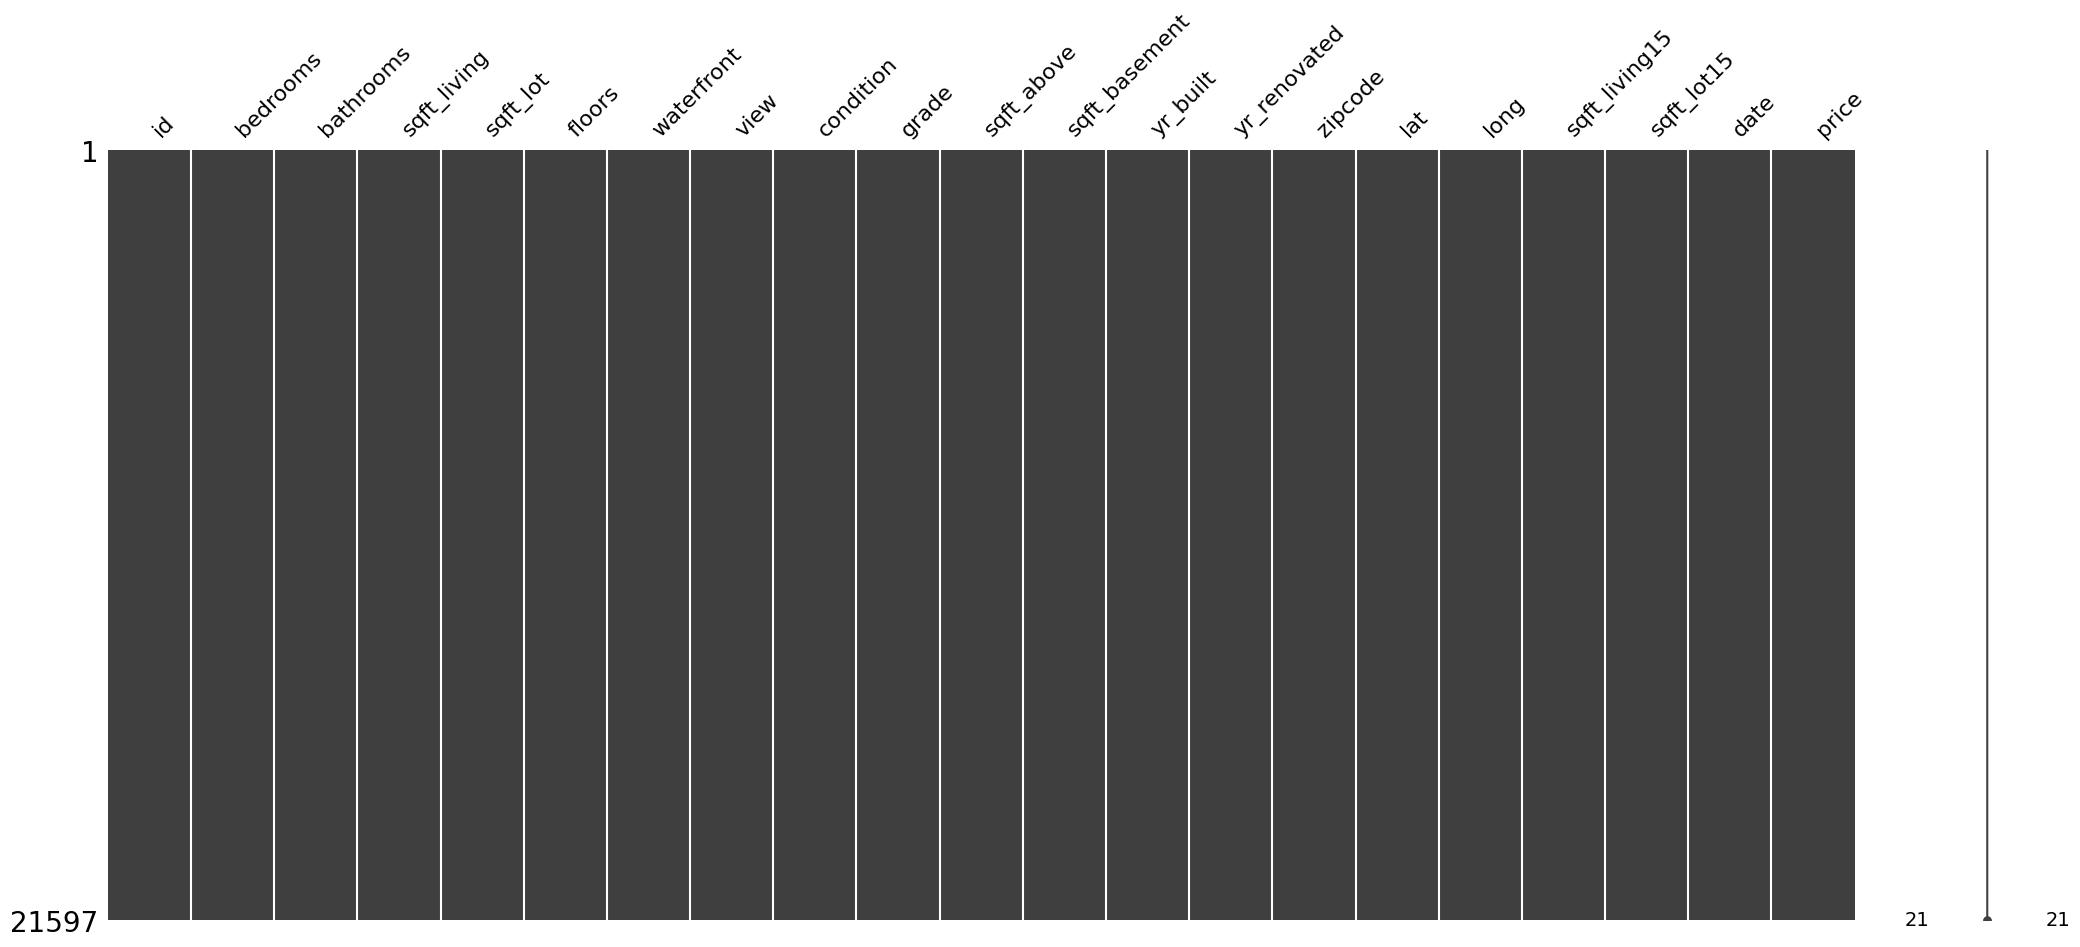

In [57]:
msno.matrix(df_house)

In [58]:
#for experiment 
df_house['yr_renovated'].div(10)

0          0.000
1       1991.000
2          0.000
3          0.000
4          0.000
          ...   
21592      0.000
21593      0.000
21594      0.000
21595      0.000
21596      0.000
Name: yr_renovated, Length: 21597, dtype: float64

In [59]:
#to remove all the zeros at the end of the values in the column 

df_house.yr_renovated = df_house.yr_renovated / 10


In [60]:
type(df_house['yr_renovated'][0])

numpy.float64

In [61]:
#convert the column as integer again 

df_house['yr_renovated'] = df_house.yr_renovated.astype('int')
type(df_house['yr_renovated'][0])

numpy.int64

In [62]:
df_house_coloumn_Dict = {'bedrooms' : int,  
                         'sqft_living' : int,
                         'sqft_lot' : int, 
                         'floors' : int, 
                         'waterfront' : bool, 
                         'view' : int,
                         'sqft_above' : int,
                         'sqft_basement' : int, 
                         'sqft_living15' : int, 
                         'sqft_lot15' : int }

df_house = df_house.astype(df_house_coloumn_Dict)
df_house.dtypes

id                        int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                 bool
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built         datetime64[ns]
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
date             datetime64[ns]
price                   float64
dtype: object

In [63]:

#Charles Christensen -
#Seller - Invest with big returns, wondering about renovation?, which Neighborhood? Timing?


#Type of Stakeholder ; Investor 

#Cares for Renovation , Neighbourhood, timing 

#Assumptions; High Value Neighbourhood (Nice neighbour hood), Timing 

#High Value Neighbourhood - Waterfront, price per sqm, 

#If the investor owns house/houses in a particular neighbourhood will determime what factor will bring him maximum return if he sells ?

# if renovations are needed on the house? 

# Questions the stakeholder can ask ? 

# His houses need renovation ? and might take longer to sell ? Dont renovate and sell

#Assumption 1- The Seller owns 2 houses in a particular neighbourhood and wants to sell

#hypothesis: Selling the house after renovating would fetch the highest return? 

#Choose a neighbourhood 
#Check correlation between renovated houses and prices of the house
#check the average renovation prices in the area (as a percentage of the total value)
#How to determine if the returns after renovation ? 
#Difference between average prices of the renovated house and and not renovated house ? 


#3 Deliverables: 
#Price per sqm in neighbourhoods 
#price per sqm compared to the yr built 




In [64]:
df_house.head(10)

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520         3      1.000         1180      5650       1       False   
1  6414100192         3      2.250         2570      7242       2       False   
2  5631500400         2      1.000          770     10000       1       False   
3  2487200875         4      3.000         1960      5000       1       False   
4  1954400510         3      2.000         1680      8080       1       False   
5  7237550310         4      4.500         5420    101930       1       False   
6  1321400060         3      2.250         1715      6819       2       False   
7  2008000270         3      1.500         1060      9711       1       False   
8  2414600126         3      1.000         1780      7470       1       False   
9  3793500160         3      2.500         1890      6560       2       False   

   view  condition  grade  ...  sqft_basement   yr_built yr_renovated  \
0     0          3      7  ...              0 1955-01-01            0   
1     0          3      7  ...            400 1951-01-01         1991   
2     0          3      6  ...              0 1933-01-01            0   
3     0          5      7  ...            910 1965-01-01            0   
4     0          3      8  ...              0 1987-01-01            0   
5     0          3     11  ...           1530 2001-01-01            0   
6     0          3      7  ...              0 1995-01-01            0   
7     0          3      7  ...              0 1963-01-01            0   
8     0          3      7  ...            730 1960-01-01            0   
9     0          3      7  ...              0 2003-01-01            0   

   zipcode    lat     long  sqft_living15  sqft_lot15       date       price  
0    98178 47.511 -122.257           1340        5650 2014-10-13  221900.000  
1    98125 47.721 -122.319           1690        7639 2014-12-09  538000.000  
2    98028 47.738 -122.233           2720        8062 2015-02-25  180000.000  
3    98136 47.521 -122.393           1360        5000 2014-12-09  604000.000  
4    98074 47.617 -122.045           1800        7503 2015-02-18  510000.000  
5    98053 47.656 -122.005           4760      101930 2014-05-12 1230000.000  
6    98003 47.310 -122.327           2238        6819 2014-06-27  257500.000  
7    98198 47.410 -122.315           1650        9711 2015-01-15  291850.000  
8    98146 47.512 -122.337           1780        8113 2015-04-15  229500.000  
9    98038 47.368 -122.031           2390        7570 2015-03-12  323000.000  

[10 rows x 21 columns]

In [65]:
import plotly.express as px

fig = px.scatter_mapbox(df_house, lat="lat", lon="long",     color="yr_built", size="sqft_living15",
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=5, mapbox_style='open-street-map')
fig.show()

In [66]:
sns.scatterplot(data=df_house, x="yr_built", y="price")

<Axes: xlabel='yr_built', ylabel='price'>

In [67]:
import plotly.express as px

fig = px.scatter_mapbox(df_house, lat="lat", lon="long",     color="price",
                 zoom=5, mapbox_style='carto-positron')
fig.update_layout(width=700, height=1000)
fig.show()

In [68]:
#top 5 most expensive areas


df_house['price_per_sqft'] = df_house['price'] / df_house['sqft_living']
df_house.head()

mean_by_category = df_house.groupby('zipcode')['sqft_living'].mean()

mean_by_category.head()

sorted_mean = mean_by_category.sort_values(ascending=False)

sorted_mean.head()


# grouped = df_house.groupby('zipcode')

# sorted_df = grouped.apply(lambda x: x.sort_values(by='price_per_sqft')).reset_index(drop=True)

# sorted_df.head()

# pivot = sorted_df.pivot_table(index=['zipcode'], values=['price_per_sqft'], aggfunc={'mean'})
# pivot



zipcode
98039   3800.900
98040   3106.833
98075   3016.370
98004   2909.022
98006   2888.295
Name: sqft_living, dtype: float64

In [69]:

pivot = df_house.pivot_table(index=['zipcode'], values=['price'], aggfunc={'median', 'mean', 'min'})
pivot

price                       
               mean      median        min
zipcode                                   
98001    281194.870  260000.000 100000.000
98002    234284.035  235000.000  95000.000
98003    294111.279  267475.000 128000.000
98004   1356523.991 1150000.000 425000.000
98005    810289.696  765475.000 400000.000
...             ...         ...        ...
98177    676419.392  554000.000 245560.000
98178    310612.756  278277.000  90000.000
98188    289078.346  264000.000 110000.000
98198    302896.739  265000.000  95000.000
98199    792187.874  689800.000 323000.000

[70 rows x 3 columns]

In [70]:
#Price: Check the distribution of housing prices. You can explore the average price, the range of prices, and any outliers. This will help you understand the affordability and market trends in the area.

#Location: Analyze the geographical distribution of properties. You can examine which neighborhoods or areas have the most and least number of listings, and whether there are any spatial patterns that might be of interest.

#Property Features: Examine the relationship between specific property features (e.g., number of bedrooms, bathrooms, square footage, amenities like a pool or garage) and the price. This can help you understand which features are driving property values in the market.

In [71]:
df_house

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520         3      1.000         1180      5650       1   
1      6414100192         3      2.250         2570      7242       2   
2      5631500400         2      1.000          770     10000       1   
3      2487200875         4      3.000         1960      5000       1   
4      1954400510         3      2.000         1680      8080       1   
...           ...       ...        ...          ...       ...     ...   
21592   263000018         3      2.500         1530      1131       3   
21593  6600060120         4      2.500         2310      5813       2   
21594  1523300141         2      0.750         1020      1350       2   
21595   291310100         3      2.500         1600      2388       2   
21596  1523300157         2      0.750         1020      1076       2   

       waterfront  view  condition  grade  ...   yr_built  yr_renovated  \
0           False     0          3      7  ... 1955-01-01             0   
1           False     0          3      7  ... 1951-01-01          1991   
2           False     0          3      6  ... 1933-01-01             0   
3           False     0          5      7  ... 1965-01-01             0   
4           False     0          3      8  ... 1987-01-01             0   
...           ...   ...        ...    ...  ...        ...           ...   
21592       False     0          3      8  ... 2009-01-01             0   
21593       False     0          3      8  ... 2014-01-01             0   
21594       False     0          3      7  ... 2009-01-01             0   
21595       False     0          3      8  ... 2004-01-01             0   
21596       False     0          3      7  ... 2008-01-01             0   

      zipcode    lat     long  sqft_living15  sqft_lot15       date  \
0       98178 47.511 -122.257           1340        5650 2014-10-13   
1       98125 47.721 -122.319           1690        7639 2014-12-09   
2       98028 47.738 -122.233           2720        8062 2015-02-25   
3       98136 47.521 -122.393           1360        5000 2014-12-09   
4       98074 47.617 -122.045           1800        7503 2015-02-18   
...       ...    ...      ...            ...         ...        ...   
21592   98103 47.699 -122.346           1530        1509 2014-05-21   
21593   98146 47.511 -122.362           1830        7200 2015-02-23   
21594   98144 47.594 -122.299           1020        2007 2014-06-23   
21595   98027 47.535 -122.069           1410        1287 2015-01-16   
21596   98144 47.594 -122.299           1020        1357 2014-10-15   

           price price_per_sqft  
0     221900.000        188.051  
1     538000.000        209.339  
2     180000.000        233.766  
3     604000.000        308.163  
4     510000.000        303.571  
...          ...            ...  
21592 360000.000        235.294  
21593 400000.000        173.160  
21594 402101.000        394.217  
21595 400000.000        250.000  
21596 325000.000        318.627  

[21597 rows x 22 columns]

In [72]:
#corelation between water front and prices 

correlation_wf_prices = df_house['price_per_sqft'].corr(df_house['waterfront'])
correlation_wf_prices

0.18664613561537366

In [73]:
#Pearson co-efficient is much closer to zero than to 1, this shows weak linear corelation between prices and water front properties, 
#neverthless there is some positive correlation 
#hence thsi factor isnt strongly affecting the proces


In [74]:
#corelation between condition and prices 

correlation_con_prices = df_house['price_per_sqft'].corr(df_house['condition'])
correlation_con_prices


0.10321347980835316

In [75]:
#corelation between grade and prices 
correlation_grade_prices = df_house['price_per_sqft'].corr(df_house['grade'])
correlation_grade_prices

0.12519951349294703

In [76]:
pivot_per_sqft = df_house.pivot_table(index=['zipcode'], values=['price_per_sqft'], aggfunc={'median', 'mean', 'min'})
pivot_per_sqft

price_per_sqft                
                  mean  median     min
zipcode                               
98001          151.348 147.141  88.699
98002          151.174 147.177  87.588
98003          157.113 154.819  88.150
98004          475.610 456.944 241.573
98005          314.967 316.340 148.751
...                ...     ...     ...
98177          292.982 272.075 139.535
98178          189.173 176.623  89.447
98188          169.007 163.897  88.542
98198          178.434 171.953  88.542
98199          376.660 354.305 211.268

[70 rows x 3 columns]

In [77]:
df_house

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520         3      1.000         1180      5650       1   
1      6414100192         3      2.250         2570      7242       2   
2      5631500400         2      1.000          770     10000       1   
3      2487200875         4      3.000         1960      5000       1   
4      1954400510         3      2.000         1680      8080       1   
...           ...       ...        ...          ...       ...     ...   
21592   263000018         3      2.500         1530      1131       3   
21593  6600060120         4      2.500         2310      5813       2   
21594  1523300141         2      0.750         1020      1350       2   
21595   291310100         3      2.500         1600      2388       2   
21596  1523300157         2      0.750         1020      1076       2   

       waterfront  view  condition  grade  ...   yr_built  yr_renovated  \
0           False     0          3      7  ... 1955-01-01             0   
1           False     0          3      7  ... 1951-01-01          1991   
2           False     0          3      6  ... 1933-01-01             0   
3           False     0          5      7  ... 1965-01-01             0   
4           False     0          3      8  ... 1987-01-01             0   
...           ...   ...        ...    ...  ...        ...           ...   
21592       False     0          3      8  ... 2009-01-01             0   
21593       False     0          3      8  ... 2014-01-01             0   
21594       False     0          3      7  ... 2009-01-01             0   
21595       False     0          3      8  ... 2004-01-01             0   
21596       False     0          3      7  ... 2008-01-01             0   

      zipcode    lat     long  sqft_living15  sqft_lot15       date  \
0       98178 47.511 -122.257           1340        5650 2014-10-13   
1       98125 47.721 -122.319           1690        7639 2014-12-09   
2       98028 47.738 -122.233           2720        8062 2015-02-25   
3       98136 47.521 -122.393           1360        5000 2014-12-09   
4       98074 47.617 -122.045           1800        7503 2015-02-18   
...       ...    ...      ...            ...         ...        ...   
21592   98103 47.699 -122.346           1530        1509 2014-05-21   
21593   98146 47.511 -122.362           1830        7200 2015-02-23   
21594   98144 47.594 -122.299           1020        2007 2014-06-23   
21595   98027 47.535 -122.069           1410        1287 2015-01-16   
21596   98144 47.594 -122.299           1020        1357 2014-10-15   

           price price_per_sqft  
0     221900.000        188.051  
1     538000.000        209.339  
2     180000.000        233.766  
3     604000.000        308.163  
4     510000.000        303.571  
...          ...            ...  
21592 360000.000        235.294  
21593 400000.000        173.160  
21594 402101.000        394.217  
21595 400000.000        250.000  
21596 325000.000        318.627  

[21597 rows x 22 columns]

In [78]:
#reference_date = pd.to_datetime('1970-01-01')
#df_house['yr_built'] = (pd.to_datetime(df_house['yr_built']) - reference_date).dt.days
#df_house


#corelation between yr_built and prices per sqft
#correlation_yrbuilt_prices = df_house['price_per_sqft'].corr(df_house['yr_built'])
#correlation_yrbuilt_prices

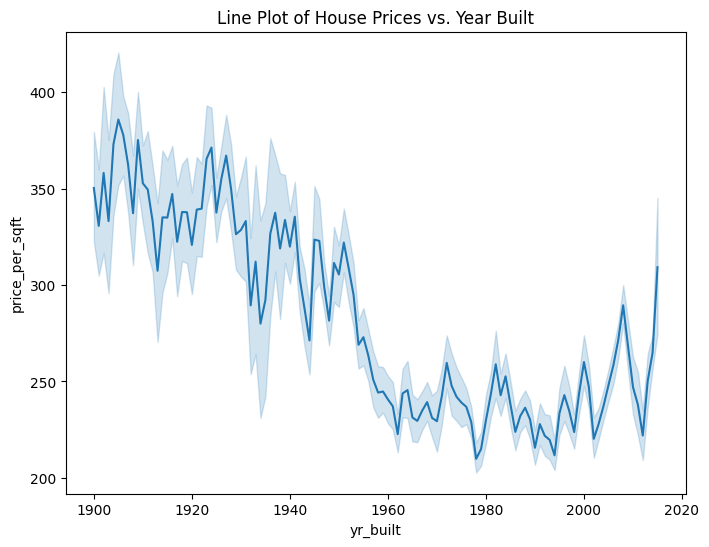

In [79]:
#yr= df_house['yr_built']
#price = df_house['price']

#plt.plot(yr, price, marker='o', linestyle='-')

plt.figure(figsize=(8, 6))
sns.lineplot(data=df_house, x='yr_built', y='price_per_sqft')
plt.title('Line Plot of House Prices vs. Year Built')
plt.show()

In [80]:
import plotly.express as px

fig = px.scatter_mapbox(df_house, lat="lat", lon="long",     color="price_per_sqft",
                 zoom=5, mapbox_style='carto-positron')
fig.update_layout(width=1000, height=500)
fig.show()

In [81]:
#there seems to be a negative correlation of old houses relative to new houses the reason being, 
#the old houses tend to be in more desireable and central neighbourhoods as they were built earler and clustered more around the desireable areas
#The newer houses have been built more in the suburbs hence they tend to be cheaper as compared to the older one in terms of current ptices. 

#link to news article; https://www.seattletimes.com/business/real-estate/seattle-home-price-hikes-lead-the-us-again-even-century-old-homes-commanding-top-dollar/#:~:text=So%20why%20are%20timeworn%20homes,said%20Estately%20CEO%20Galen%20Ward.

In [82]:
df_house

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520         3      1.000         1180      5650       1   
1      6414100192         3      2.250         2570      7242       2   
2      5631500400         2      1.000          770     10000       1   
3      2487200875         4      3.000         1960      5000       1   
4      1954400510         3      2.000         1680      8080       1   
...           ...       ...        ...          ...       ...     ...   
21592   263000018         3      2.500         1530      1131       3   
21593  6600060120         4      2.500         2310      5813       2   
21594  1523300141         2      0.750         1020      1350       2   
21595   291310100         3      2.500         1600      2388       2   
21596  1523300157         2      0.750         1020      1076       2   

       waterfront  view  condition  grade  ...   yr_built  yr_renovated  \
0           False     0          3      7  ... 1955-01-01             0   
1           False     0          3      7  ... 1951-01-01          1991   
2           False     0          3      6  ... 1933-01-01             0   
3           False     0          5      7  ... 1965-01-01             0   
4           False     0          3      8  ... 1987-01-01             0   
...           ...   ...        ...    ...  ...        ...           ...   
21592       False     0          3      8  ... 2009-01-01             0   
21593       False     0          3      8  ... 2014-01-01             0   
21594       False     0          3      7  ... 2009-01-01             0   
21595       False     0          3      8  ... 2004-01-01             0   
21596       False     0          3      7  ... 2008-01-01             0   

      zipcode    lat     long  sqft_living15  sqft_lot15       date  \
0       98178 47.511 -122.257           1340        5650 2014-10-13   
1       98125 47.721 -122.319           1690        7639 2014-12-09   
2       98028 47.738 -122.233           2720        8062 2015-02-25   
3       98136 47.521 -122.393           1360        5000 2014-12-09   
4       98074 47.617 -122.045           1800        7503 2015-02-18   
...       ...    ...      ...            ...         ...        ...   
21592   98103 47.699 -122.346           1530        1509 2014-05-21   
21593   98146 47.511 -122.362           1830        7200 2015-02-23   
21594   98144 47.594 -122.299           1020        2007 2014-06-23   
21595   98027 47.535 -122.069           1410        1287 2015-01-16   
21596   98144 47.594 -122.299           1020        1357 2014-10-15   

           price price_per_sqft  
0     221900.000        188.051  
1     538000.000        209.339  
2     180000.000        233.766  
3     604000.000        308.163  
4     510000.000        303.571  
...          ...            ...  
21592 360000.000        235.294  
21593 400000.000        173.160  
21594 402101.000        394.217  
21595 400000.000        250.000  
21596 325000.000        318.627  

[21597 rows x 22 columns]

In [83]:
#convert the date year built into comparable number with help of reference date to determione age of the house
reference_date = pd.to_datetime('1970-01-01')
df_house['yr_built'] = (pd.to_datetime(df_house['yr_built']) - reference_date).dt.days
df_house


id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520         3      1.000         1180      5650       1   
1      6414100192         3      2.250         2570      7242       2   
2      5631500400         2      1.000          770     10000       1   
3      2487200875         4      3.000         1960      5000       1   
4      1954400510         3      2.000         1680      8080       1   
...           ...       ...        ...          ...       ...     ...   
21592   263000018         3      2.500         1530      1131       3   
21593  6600060120         4      2.500         2310      5813       2   
21594  1523300141         2      0.750         1020      1350       2   
21595   291310100         3      2.500         1600      2388       2   
21596  1523300157         2      0.750         1020      1076       2   

       waterfront  view  condition  grade  ...  yr_built  yr_renovated  \
0           False     0          3      7  ...     -5479             0   
1           False     0          3      7  ...     -6940          1991   
2           False     0          3      6  ...    -13514             0   
3           False     0          5      7  ...     -1826             0   
4           False     0          3      8  ...      6209             0   
...           ...   ...        ...    ...  ...       ...           ...   
21592       False     0          3      8  ...     14245             0   
21593       False     0          3      8  ...     16071             0   
21594       False     0          3      7  ...     14245             0   
21595       False     0          3      8  ...     12418             0   
21596       False     0          3      7  ...     13879             0   

       zipcode    lat     long  sqft_living15  sqft_lot15       date  \
0        98178 47.511 -122.257           1340        5650 2014-10-13   
1        98125 47.721 -122.319           1690        7639 2014-12-09   
2        98028 47.738 -122.233           2720        8062 2015-02-25   
3        98136 47.521 -122.393           1360        5000 2014-12-09   
4        98074 47.617 -122.045           1800        7503 2015-02-18   
...        ...    ...      ...            ...         ...        ...   
21592    98103 47.699 -122.346           1530        1509 2014-05-21   
21593    98146 47.511 -122.362           1830        7200 2015-02-23   
21594    98144 47.594 -122.299           1020        2007 2014-06-23   
21595    98027 47.535 -122.069           1410        1287 2015-01-16   
21596    98144 47.594 -122.299           1020        1357 2014-10-15   

           price price_per_sqft  
0     221900.000        188.051  
1     538000.000        209.339  
2     180000.000        233.766  
3     604000.000        308.163  
4     510000.000        303.571  
...          ...            ...  
21592 360000.000        235.294  
21593 400000.000        173.160  
21594 402101.000        394.217  
21595 400000.000        250.000  
21596 325000.000        318.627  

[21597 rows x 22 columns]

In [84]:
correlation_yrbuilt_prices = df_house['price_per_sqft'].corr(df_house['yr_built'])
correlation_yrbuilt_prices

-0.29004125027125255

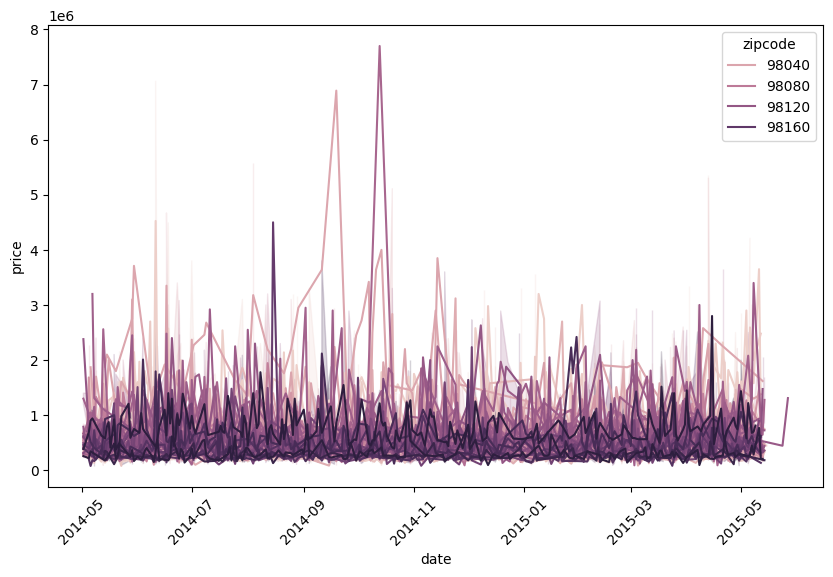

In [85]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_house, x='date', y='price', hue='zipcode')
plt.xticks(rotation=45)

plt.show()

In [86]:
category_to_plot = '98039'
Client_zip = df_house.query('zipcode==98039')
plt.figure(figsize=(10, 6))
sns.lineplot(data=Client_zip, x='date', y='price_per_sqft')
plt.title(f'Line Plot of Price Over Time for Category in Medina')

Text(0.5, 1.0, 'Line Plot of Price Over Time for Category in Medina')

In [87]:
fig = px.scatter_mapbox(Client_zip, lat="lat", lon="long",  color='price_per_sqft',
                 zoom=5, mapbox_style='carto-positron')
fig.update_layout(width=1000, height=500)
fig.show()

In [88]:
#5 Most expensive areas by mean
mean_by_category = df_house.groupby('zipcode')['price_per_sqft'].mean()

mean_by_category.head()

sorted_mean = mean_by_category.sort_values(ascending=False)

sorted_mean.head()

zipcode
98039   568.242
98004   475.610
98112   438.878
98109   433.559
98119   432.352
Name: price_per_sqft, dtype: float64

In [89]:
#5 Most expensive areas by median
median_by_category = df_house.groupby('zipcode')['price_per_sqft'].median()

median_by_category.head()

sorted_median = median_by_category.sort_values(ascending=False)

sorted_median.head()

zipcode
98039   565.166
98004   456.944
98109   427.696
98112   424.242
98119   416.653
Name: price_per_sqft, dtype: float64

In [90]:
#5 Cheapest Areas per sqft price by mean 
mean_by_category = df_house.groupby('zipcode')['price_per_sqft'].mean()

mean_by_category.head()

sorted_mean = mean_by_category.sort_values(ascending=True)

sorted_mean.head()

zipcode
98023   148.922
98002   151.174
98001   151.348
98032   154.220
98030   155.156
Name: price_per_sqft, dtype: float64

In [69]:
#5 Cheapest areas by median
median_by_category = df_house.groupby('zipcode')['price_per_sqft'].median()

median_by_category.head()

sorted_median = median_by_category.sort_values(ascending=True)

sorted_median.head()

zipcode
98023   144.970
98032   146.205
98001   147.141
98002   147.177
98092   149.180
Name: price_per_sqft, dtype: float64

In [91]:


#corelation between yr_renovated and prices per sqft
correlation_renov_prices = df_house['price_per_sqft'].corr(df_house['yr_renovated'])
correlation_renov_prices

#almost no correlation between renovated and prices

0.09839741768118616

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
21592   263000018         3      2.500         1530      1131       3   
21593  6600060120         4      2.500         2310      5813       2   
21594  1523300141         2      0.750         1020      1350       2   
21595   291310100         3      2.500         1600      2388       2   
21596  1523300157         2      0.750         1020      1076       2   

       waterfront  view  condition  grade  ...  yr_built  yr_renovated  \
21592       False     0          3      8  ...     14245             0   
21593       False     0          3      8  ...     16071             0   
21594       False     0          3      7  ...     14245             0   
21595       False     0          3      8  ...     12418             0   
21596       False     0          3      7  ...     13879             0   

       zipcode    lat     long  sqft_living15  sqft_lot15       date  \
21592    98103 47.699 -122.346           1530        1509 2014-05-21   
21593    98146 47.511 -122.362           1830        7200 2015-02-23   
21594    98144 47.594 -122.299           1020        2007 2014-06-23   
21595    98027 47.535 -122.069           1410        1287 2015-01-16   
21596    98144 47.594 -122.299           1020        1357 2014-10-15   

           price price_per_sqft  
21592 360000.000        235.294  
21593 400000.000        173.160  
21594 402101.000        394.217  
21595 400000.000        250.000  
21596 325000.000        318.627  

[5 rows x 22 columns]